# Boston Housing data


This part of the tutorial loads data about Boston housing and median house prices. The goal is to predict the housing price in each district given a series of features.

Features include crime rate, air quality and plot size.

###What you will learn
You will learn to load a sample data set, the Boston Housing set, divide the set into training and test, create linear regression coefficients and test your work. Extra models will be shown, so you can make it ridiculously easy for yourself to create linear regression models.

<table><tr><td><img src="boston_roads.png" width="70%" height="70%"><center>Boston Roads</center></td><td><img src="colorful_row_houses.jpg" width="70%" height="70%"><center>Typical boston houses</center></td></tr>
</table>

#How to learn from this tutorial

* Some code examples require interaction. Look for this:
  * **Exercises (1-5)**
  * Change the code and press play for the cell you changed
  * Get a feel for how to change parameters to increase or decrease accuracy
* Some code examples do not require interaction
  * Just read and try to understand the code
  * If you have any questions, ask Lydia, Arsen or David


#What is R-squared?
  * R-squared is a measure of fit of a curve to the data
  * A good R-squared is 1.0
  * A bad R-squared is lower
  * Try to increase R-squared in the examples

# What is a good feature for regression?
  * A good feature contains most of its data on or near a straight line
  * It has many incremental changes along the vertical and horizontal axes
  * Both positively and negatively correlated features can help the model

In [2]:
# Load the data
import warnings
warnings.filterwarnings('ignore')
# load 500-example matrix
from sklearn.datasets import load_boston

# training data set size out of around 500 samples
# complement is test set

TRAIN_SIZE = 200

warnings.filterwarnings('ignore')

# load sample data from scikit
boston = load_boston()

# TRAINING

# training features matrix, e.g. plot size
X_train = boston["data"][:TRAIN_SIZE]
# training housing price vector
y_train = boston["target"][:TRAIN_SIZE]

# TEST

# test features
X_test = boston["data"][TRAIN_SIZE:]
# test housing prices
y_test = boston["target"][TRAIN_SIZE:]

all_features = boston["feature_names"]


#Feature Explanation
What do these features mean? Here is an explanation of the feature names.
<br><b>Exercise 1</b>: Which do you think will have the greatest effect?

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 dollars
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: Percent lower status of the population

#Plot Data
Get a feel for plotting data.
<br><b>Exercise 2</b>:
Increase `FEATURES_TO_SHOW` to see all 13 features.<br>
<br>
Notice with the first two features, a higher crime rate (CRIM) correlates with lower prices, while larger plot size (ZN) correlates with higher prices.

<b>Exercise 3</b>:
Look at more graphs of features and find those that look to be the best
fits. Which features are the best?


Feature: CRIM


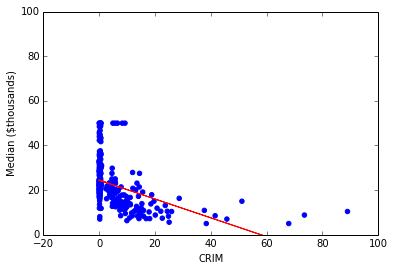

y=-0.421677x+(24.415939), R^2 = 0.20

Feature: ZN


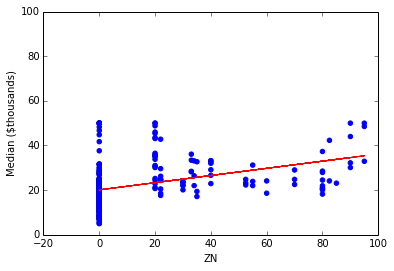

y=0.160753x+(20.109698), R^2 = 0.15


In [3]:
# This prints graphs for each feature
# LET's plot it with matproltib
import matplotlib.pyplot as plt
# numerical code
import numpy
import pylab
# statistical and other math code
import scipy
# ALLOW inline graphs in the ipython notebook, not popups
%matplotlib inline



FEATURES_TO_SHOW = 2 # CHANGE ME

for feature_name in all_features[:FEATURES_TO_SHOW]:
    print
    print 'Feature: %s' % feature_name
    # Grab index for feature
    idx = list(all_features).index(feature_name)
    # Use index to gather numerical data
    x_vals = [x[idx] for x in X_test]
    # y_test are housing values
    plt.scatter(x_vals, y_test, color='blue')

    # fit a line to the scattered data
    z = numpy.polyfit(x_vals, y_test, 1)
    p = numpy.poly1d(z)
    # plot scatter plot with linear regression line
    pylab.plot(x_vals, p(x_vals),'r-')
    
    
    
    plt.ylim([-0.05, 100.0])
    plt.xlabel(feature_name)
    plt.ylabel('Median ($thousands)')
    plt.show()
    # fit a line
    # run linear regression separately on each feature
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_vals, y_test)
    print "y=%.6fx+(%.6f), R^2 = %.2f" % (z[0], z[1], r_value**2)


# LOOK at r-squared. A larger value is better, and r-squared = 1 is the best fit.

# Training Set Numbers
Next let's see some of the training numbers. X is a matrix of all feature values. y is a vector of target data.

In [4]:
# This prints a summary of the 13 features and 1 target value
all_features = boston["feature_names"]
print str(all_features)
print 'y training size is %d' % len(y_train)
print 'X training size is %d x %d' % (len(X_train[0]), len(X_train))
print 'y training set is in $thousands %s' % str(y_train[:5])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']
y training size is 200
X training size is 13 x 200
y training set is in $thousands [ 24.   21.6  34.7  33.4  36.2]


# Test Set Numbers
Next let's see some of the test numbers. X is a matrix of all feature values. y is a vector of target data.

In [5]:
# This prints a summary of the 13 features and 1 target value

print 'y test size is %d' % len(y_test)
print 'X test size is %d x %d' % (len(X_test[0]), len(X_test))
print 'y test set is in $thousands %s' % str(y_test[:5])

y test size is 306
X test size is 13 x 306
y test set is in $thousands [ 32.9  24.1  42.3  48.5  50. ]


# First Linear Regression

Let's try a couple of models, first a linear regression based on least squares. The r-squared should be close to 1 if the model is good. Don't be fooled by the unusually high r-squared on the training set, because it will almost always be a better fit to the training set than the test set. It's a line that does not describe the reality of taking on a real set of new random data.

In [6]:
# This prints results of a naive model that lacks scaling and feature selection
from sklearn import linear_model
from sklearn.metrics import r2_score

clf_linear_simple = linear_model.LinearRegression()

clf_linear_simple.fit (X_train, y_train)
linear_r2 = r2_score(y_train, clf_linear_simple.predict(X_train))
# Find the r-squared of the training set
print 'R^2 train is %f # bogus' % linear_r2
# This is the real score, the one you share with co-workers
linear_test_r2 = r2_score(y_test, clf_linear_simple.predict(X_test))
print 'R^2 test is %f # Needs improvement' % linear_test_r2
print 'Coefficients: ' + str(clf_linear_simple.coef_)


R^2 train is 0.847066 # bogus
R^2 test is -2.204567 # Needs improvement
Coefficients: [  1.21702620e+00   2.28358110e-02   4.05630994e-03   1.55045296e-02
  -7.33657559e+00   9.01161321e+00  -3.88193998e-02  -1.13348841e+00
   4.60084845e-01  -1.76861359e-02  -6.84160019e-01   1.86722634e-02
  -1.86732207e-01]


# Feature Scaling
## Why scaling?
<br>
Feature scaling helps prevent some features from dominating a model. Consider that some features might be greater than 10,000 and others less than 1. Without feature scaling, large-value features can dominate and beat out other smaller, but still more accurate, features.

In [7]:
# This scales the feature (X) data
# SCALE it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scale training set
X_train_scaled = scaler.fit_transform(X_train)
# scale test set
X_test_scaled = scaler.fit_transform(X_test)
# No need to scale y target set

#Rank Features
Here we want to order the features by r-squared value. We must rank features to discard the ones that do not lead to a better model. Adding random data into the model can create inaccurate models.

In [8]:
# This ranks the features in order of importance
# Higher score is better
import operator
# dict for saving r-squared values
r2_values = {}
# Use all features but housing price
for feature_name in all_features[:-1]:
    # index of feature
    idx = list(all_features).index(feature_name)
    # Find r-value of feature
    x_vals = [x[idx] for x in X_train_scaled]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_vals, y_train)
    r2_values[feature_name] = r_value ** 2
# Sort using numerical field
sorted_features = sorted(r2_values.items(), key=operator.itemgetter(1), reverse=True)
print 'Sorted features: ' + str(sorted_features)
# Print good features, best to worse
good_features = [x[0] for x in sorted_features]
print 'Good features: ' + str(good_features)

Sorted features: [('RM', 0.73894619361181768), ('LSTAT', 0.52769518464243903), ('PTRATIO', 0.13342654496256567), ('AGE', 0.12980144789844669), ('NOX', 0.12410490220550857), ('INDUS', 0.11792867607631566), ('ZN', 0.10376321333031296), ('TAX', 0.054956412833148879), ('CRIM', 0.05419383650313047), ('B', 0.053449401983043113), ('RAD', 0.038413143693064977), ('DIS', 0.035549151338871841), ('CHAS', 0.0077014608973463719)]
Good features: ['RM', 'LSTAT', 'PTRATIO', 'AGE', 'NOX', 'INDUS', 'ZN', 'TAX', 'CRIM', 'B', 'RAD', 'DIS', 'CHAS']


#Feature Selection
We try to find the best features using a series of random sets. Start by importing the data and using the random forest regressor to select features.

#Make a reduced set
Make slimmed down training and test set of the best features. Try to get a higher r-squared if possible.

**Exercise 4**:
Change `FEATURE_COUNT` to keep only the top features. Notice how the R-squared value changes.

In [9]:

# Change this to use different top features
FEATURE_COUNT = 13 # CHANGE ME

# USE good features to train next model
X_selected_train = []
X_selected_test = []

# TRAINING SET

for line in X_train_scaled:
    x_out = []
    feature_num = 0
    for feature_name in all_features:
        if feature_name in good_features[:FEATURE_COUNT]:
            # Append only top features
            x_out.append(line[feature_num])
        feature_num += 1
    X_selected_train.append(x_out)

# TEST SET

for line in X_test_scaled:
    x_out = []
    feature_num = 0
    for feature_name in all_features:
        if feature_name in good_features[:FEATURE_COUNT]:
            # Append only top features
            x_out.append(line[feature_num])
        feature_num += 1
    X_selected_test.append(x_out)
    clf_select = linear_model.LinearRegression()

clf_select.fit (X_selected_train, y_train)
print('R^2 selected train linear score: %.2f # bogus' % clf_select.score(X_selected_train, y_train))
print('R^2 selected test linear score: %.2f' % clf_select.score(X_selected_test, y_test))

R^2 selected train linear score: 0.85 # bogus
R^2 selected test linear score: 0.58


#Test Scaled Data
Test the scaled version.

In [10]:
# This tests the scaled features
clf = linear_model.LinearRegression()

clf.fit(X_train_scaled, y_train)

print('R^2 test scaled linear score: %.2f' % clf.score(X_test_scaled, y_test))

R^2 test scaled linear score: 0.58


#Test Scaled and Selected Data

In [11]:
# This tests the scaled and selected features
X_train_select_scaled = scaler.fit_transform(X_selected_train)
X_test_select_scaled = scaler.fit_transform(X_selected_test)


clf_select_scaled = linear_model.LinearRegression()
clf_select_scaled.fit(X_train_select_scaled, y_train)
print('R^2 test select scaled linear score: %.2f' % clf_select_scaled.score(X_test_select_scaled, y_test))

R^2 test select scaled linear score: 0.58


# Trying Other Models
One great feature of Scikit-learn is to offer a low-friction way to try several model types with the same data to find one that works well for your needs. Here, we take a random forest regressor, and will tweak it to improve the R-squared value.

## Random Forest
A random forest regressor creates decision trees and attempts randomly to find a tree where the housing price is estimated accurately using various decisions. One decision might be is ZN greater than 40 and lower than 60? If so, the housing price should be &dollar;30,000.<br><br>The random forest optimizes the results under the hood. This is the easy way. This really is random. Press play twice for the next code cell and watch the score change. <br>
<table><tr><td><img src="regressor.png" width="60%"><br><center>Curve fitting with a random forest regressor</center></td></tr></table>

**Exercise 5**:
Change the number of estimators and max_depth to improve the R-squared score.

In [12]:
# This shows the use of a random forest

from sklearn.ensemble import RandomForestRegressor
rf_first = RandomForestRegressor(n_estimators=20, max_depth=4)
rf_first.fit(X_train, y_train)
print('R^2 score: %.2f' % rf_first.score(X_test, y_test))

R^2 score: 0.62
